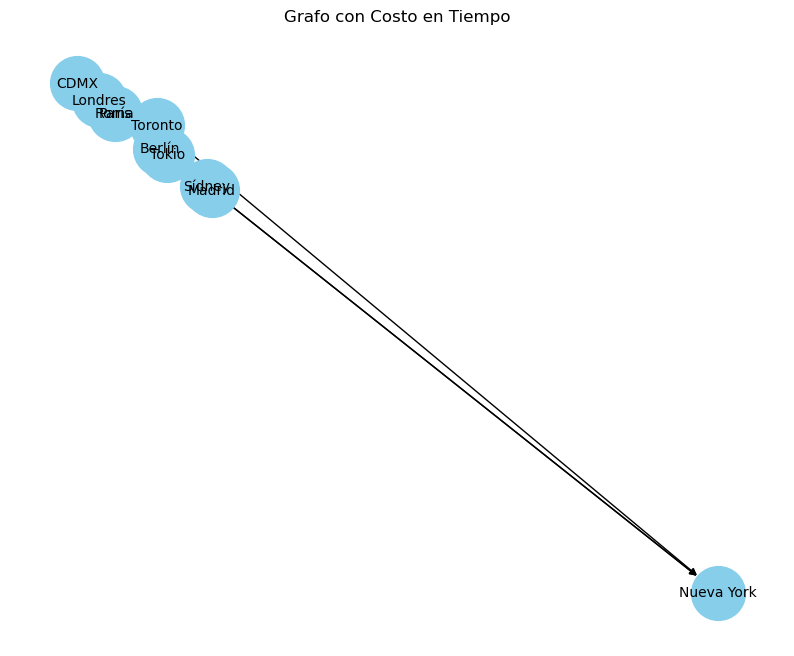

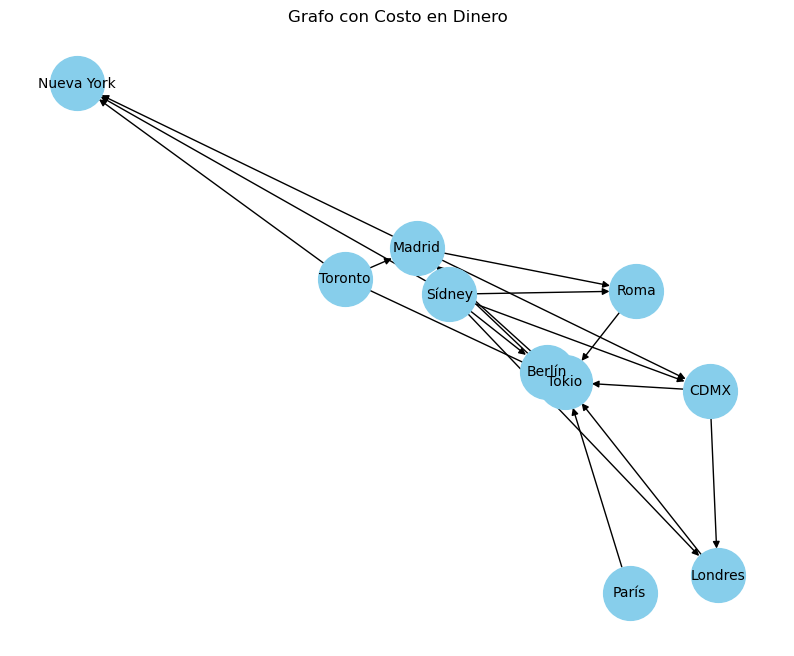

In [4]:
#importamos las librerias necesarias
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('ejemplosvuelos.csv')

# Crear los grafos
G_tiempo = nx.DiGraph()  # Grafo dirigido para el tiempo
G_precio = nx.DiGraph()  # Grafo dirigido para el precio

# Añadir los nodos y las aristas a los grafos
for index, row in df.iterrows():
    origen = row['Origen']
    destino = row['Destino']
    tiempo_vuelo = pd.to_datetime(row['Fecha_Llegada'] + ' ' + row['Hora_Llegada_Destino']) - pd.to_datetime(row['Fecha_Salida'] + ' ' + row['Hora_Salida_Origen'])
    precio_vuelo = row['Precio_Vuelo']

    # Grafo con costo en tiempo
    G_tiempo.add_edge(origen, destino, weight=tiempo_vuelo.total_seconds())

    # Grafo con costo en dinero
    G_precio.add_edge(origen, destino, weight=precio_vuelo)

# Dibujar los grafos
plt.figure(figsize=(10, 8))
plt.title("Grafo con Costo en Tiempo")
nx.draw(G_tiempo, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
plt.show()

plt.figure(figsize=(10, 8))
plt.title("Grafo con Costo en Dinero")
nx.draw(G_precio, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
plt.show()


In [3]:
import heapq

def busqueda_costo_uniforme(grafo, origen, destino):
    # Inicializar la cola de prioridad
    cola_prioridad = [(0, origen, [])]  # (costo acumulado, nodo actual, ruta)
    visitados = set()
    
    while cola_prioridad:
        (costo_actual, nodo_actual, ruta_actual) = heapq.heappop(cola_prioridad)

        if nodo_actual in visitados:
            continue
        
        # Añadir el nodo actual a la ruta
        ruta_actual = ruta_actual + [nodo_actual]
        visitados.add(nodo_actual)
        
        if nodo_actual == destino:
            return (costo_actual, ruta_actual)

        for vecino, datos in grafo[nodo_actual].items():
            if vecino not in visitados:
                costo_vuelo = datos['weight']
                heapq.heappush(cola_prioridad, (costo_actual + costo_vuelo, vecino, ruta_actual))

    return None  # Si no se encuentra una ruta

# Llamar el algoritmo para ambos grafos (tiempo y dinero)
costo_tiempo, ruta_tiempo = busqueda_costo_uniforme(G_tiempo, 'A', 'B')
costo_dinero, ruta_dinero = busqueda_costo_uniforme(G_precio, 'A', 'B')

print("Ruta más rápida:", ruta_tiempo, "con tiempo:", costo_tiempo)
print("Ruta más económica:", ruta_dinero, "con costo:", costo_dinero)


KeyError: 'A'